In [10]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.callbacks import CSVLogger
import numpy as np

# Define a simple model
model = Sequential([
    Input(shape=(100,)),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Create CSVLogger callback
csv_logger = CSVLogger('training.log', append=False)

# Create sample data for demonstration (Replace with your actual data)
x_train = np.random.rand(1000, 100)
y_train = np.random.rand(1000, 10)
x_val = np.random.rand(200, 100)
y_val = np.random.rand(200, 10)

# Train the model
model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val), callbacks=[csv_logger])

print("Training completed. Check 'training.log' for details.")


Epoch 1/10
32/32 [==============================] - 1s 11ms/step - loss: 0.6980 - accuracy: 0.0810 - val_loss: 0.6952 - val_accuracy: 0.1150
Epoch 2/10
32/32 [==============================] - 0s 4ms/step - loss: 0.6940 - accuracy: 0.0950 - val_loss: 0.6950 - val_accuracy: 0.1000
Epoch 3/10
32/32 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.0980 - val_loss: 0.6940 - val_accuracy: 0.0950
Epoch 4/10
32/32 [==============================] - 0s 3ms/step - loss: 0.6920 - accuracy: 0.1120 - val_loss: 0.6932 - val_accuracy: 0.1400
Epoch 5/10
32/32 [==============================] - 0s 3ms/step - loss: 0.6912 - accuracy: 0.1260 - val_loss: 0.6941 - val_accuracy: 0.1350
Epoch 6/10
32/32 [==============================] - 0s 3ms/step - loss: 0.6904 - accuracy: 0.1200 - val_loss: 0.6933 - val_accuracy: 0.1200
Epoch 7/10
32/32 [==============================] - 0s 3ms/step - loss: 0.6895 - accuracy: 0.1380 - val_loss: 0.6945 - val_accuracy: 0.1250
Epoch 8/10
32/32 [=

In [17]:
import csv

# know the file path
filepath = 'training.log'
# use a context manager to open the file as a read-only
with open(filepath,"r") as file:
    # use csv library to read the csv and store it in a variable
    csv_reader = csv.reader(file)
    # read the first row of the csv if it contains headers and store those in a variable
    headers = next(csv_reader)
    print(f"Headers: {headers}")

    # A csv is best treated as a dictionary, so create an empty dict to hold the data
    data = {}
    # For every header in headers, set the header as a key and the value as an empty array.
    for header in headers:
        data[header] = []

    print(f"data: {data}")

    # Now for row in the file, for each header in header, append that data in the header's column to the empty array for the dicitonary 
    for row in csv_reader:
        for i, header in enumerate(headers):
            data[header].append(row[i])

print(f"Log Data: {data}")

# convert numerical values to a float for better plotting.
for i in data:
    data[i] = [float(element) for element in data[i]]
print(f"Log Data: {data}")

Headers: ['epoch', 'accuracy', 'loss', 'val_accuracy', 'val_loss']
data: {'epoch': [], 'accuracy': [], 'loss': [], 'val_accuracy': [], 'val_loss': []}
Log Data: {'epoch': ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], 'accuracy': ['0.08100000023841858', '0.0949999988079071', '0.09799999743700027', '0.1120000034570694', '0.12600000202655792', '0.11999999731779099', '0.1379999965429306', '0.15399999916553497', '0.14800000190734863', '0.1679999977350235'], 'loss': ['0.698042094707489', '0.6940414905548096', '0.6930038928985596', '0.6920468807220459', '0.6911734342575073', '0.6904430985450745', '0.6895102858543396', '0.6885457634925842', '0.6876171231269836', '0.6862885355949402'], 'val_accuracy': ['0.11500000208616257', '0.10000000149011612', '0.0949999988079071', '0.14000000059604645', '0.13500000536441803', '0.11999999731779099', '0.125', '0.10499999672174454', '0.14499999582767487', '0.10499999672174454'], 'val_loss': ['0.695232629776001', '0.6950293183326721', '0.6940377950668335

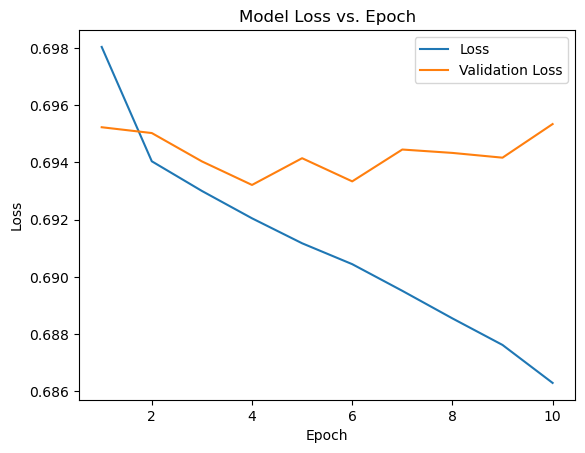

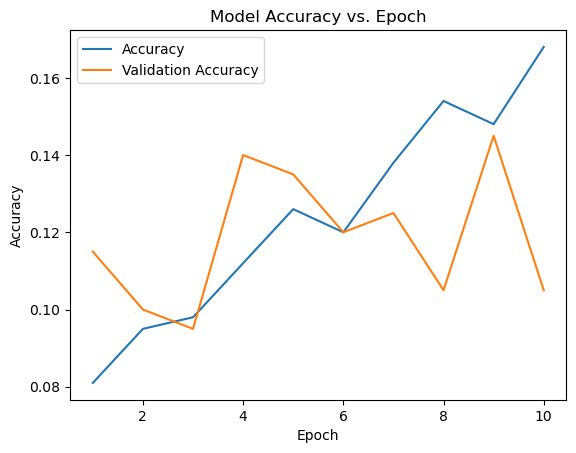

In [18]:
import matplotlib.pyplot as plt
# Plot training & validation loss values
x = [epoch+1 for epoch in data['epoch']]
plt.plot(x,data['loss'],label="Loss")
plt.plot(x,data['val_loss'],label="Validation Loss")
plt.title('Model Loss vs. Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(x,data['accuracy'],label="Accuracy")
plt.plot(x,data['val_accuracy'],label="Validation Accuracy")
plt.title('Model Accuracy vs. Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

